# Generate a token

In [9]:
import requests
import json
import pandas as pd
import numpy as np

auth_data = {
    'grant_type'    : 'client_credentials',
    'client_id'     : 'xxx',
    'client_secret' : 'xxxx',
    'scope'         : 'read_product_data read_financial_data read_content'
}

# create Session instance
session = requests.Session()

# make a POST to retrieve access_token
auth_request = session.post('https://idfs.gs.com/as/token.oauth2', data = auth_data)
access_token_dict = json.loads(auth_request.text)
access_token = access_token_dict['access_token']

# update session headers
session.headers.update({'Authorization':'Bearer '+ access_token})

print(access_token)

xxxxx,


# Get dataset coverage

In [10]:
import pandas as pd
request_url = 'https://api.marquee.gs.com/v1/data/USCANFPP_MINI/coverage?limit=100'
request = session.get(url=request_url)
data = json.loads(request.text)
df = pd.DataFrame(data['results'])
gsids = df.gsid
print(gsids)

0      10516
1      10696
2      11308
3      11896
4      13901
5      13936
6      14593
7     148401
8     149756
9     150407
10     15579
11    173578
12     12490
13    176665
14    177256
15     17750
16     85072
17    183269
18    183414
19    151048
20     18729
21    188329
22    188804
23    193155
24    193324
25    198025
26    152963
27    161467
28    213305
29    216587
       ...  
70     78975
71     79145
72     79265
73     79758
74     80286
75     80791
76     81116
77     82598
78    194688
79     84275
80    197235
81     84769
82    905255
83     85517
84     85627
85     85631
86     85914
87     86196
88     86356
89     86372
90    202271
91    901237
92    226278
93    902608
94    902704
95    903917
96    905288
97    905632
98     91556
99     16678
Name: gsid, Length: 100, dtype: object


In [11]:
data

{'results': [{'gsid': '10516'},
  {'gsid': '10696'},
  {'gsid': '11308'},
  {'gsid': '11896'},
  {'gsid': '13901'},
  {'gsid': '13936'},
  {'gsid': '14593'},
  {'gsid': '148401'},
  {'gsid': '149756'},
  {'gsid': '150407'},
  {'gsid': '15579'},
  {'gsid': '173578'},
  {'gsid': '12490'},
  {'gsid': '176665'},
  {'gsid': '177256'},
  {'gsid': '17750'},
  {'gsid': '85072'},
  {'gsid': '183269'},
  {'gsid': '183414'},
  {'gsid': '151048'},
  {'gsid': '18729'},
  {'gsid': '188329'},
  {'gsid': '188804'},
  {'gsid': '193155'},
  {'gsid': '193324'},
  {'gsid': '198025'},
  {'gsid': '152963'},
  {'gsid': '161467'},
  {'gsid': '213305'},
  {'gsid': '216587'},
  {'gsid': '216722'},
  {'gsid': '217708'},
  {'gsid': '22293'},
  {'gsid': '222946'},
  {'gsid': '223416'},
  {'gsid': '16432'},
  {'gsid': '16600'},
  {'gsid': '227284'},
  {'gsid': '230958'},
  {'gsid': '25022'},
  {'gsid': '26403'},
  {'gsid': '26825'},
  {'gsid': '29209'},
  {'gsid': '172890'},
  {'gsid': '18163'},
  {'gsid': '46886'}

# Get data (examples)

In [12]:
{
    "startDate": "2015-11-02",
    "endDate": "2015-11-04",
    "where": {
        "gsid": [ "10516", "10696", "11308", "11896", "13901" ]
    }
}

{'endDate': '2015-11-04',
 'startDate': '2015-11-02',
 'where': {'gsid': ['10516', '10696', '11308', '11896', '13901']}}

In [13]:
payload = {
    "startDate": "2015-11-02",
    "endDate": "2015-11-04",
    "where": {
        "ticker": [ "FB", "AAPL", "GOOGL" ]
    }
}

request_url = 'https://api.marquee.gs.com/v1/data/USCANFPP_MINI/query'
request = session.post(url=request_url, json = payload)
results = json.loads(request.text)
data = results['data']
print(data)

[{'date': '2015-11-02', 'gsid': '227284', 'ticker': 'FB', 'financialReturnsScore': 0.764, 'growthScore': 0.88, 'multipleScore': 0.948, 'integratedScore': 0.566, 'updateTime': '2017-05-11T19:47:36Z'}, {'date': '2015-11-03', 'gsid': '227284', 'ticker': 'FB', 'financialReturnsScore': 0.766, 'growthScore': 0.88, 'multipleScore': 0.944, 'integratedScore': 0.566, 'updateTime': '2017-05-11T19:47:36Z'}, {'date': '2015-11-04', 'gsid': '227284', 'ticker': 'FB', 'financialReturnsScore': 0.766, 'growthScore': 0.882, 'multipleScore': 0.944, 'integratedScore': 0.568, 'updateTime': '2017-05-11T19:47:36Z'}, {'date': '2015-11-02', 'gsid': '14593', 'ticker': 'AAPL', 'financialReturnsScore': 0.96, 'growthScore': 0.704, 'multipleScore': 0.052, 'integratedScore': 0.872, 'updateTime': '2017-05-11T19:47:36Z'}, {'date': '2015-11-03', 'gsid': '14593', 'ticker': 'AAPL', 'financialReturnsScore': 0.96, 'growthScore': 0.706, 'multipleScore': 0.052, 'integratedScore': 0.872, 'updateTime': '2017-05-11T19:47:36Z'}, {

## Try to fetch the data for all the stocks at certain time.

In [14]:
list(gsids.values)

['10516',
 '10696',
 '11308',
 '11896',
 '13901',
 '13936',
 '14593',
 '148401',
 '149756',
 '150407',
 '15579',
 '173578',
 '12490',
 '176665',
 '177256',
 '17750',
 '85072',
 '183269',
 '183414',
 '151048',
 '18729',
 '188329',
 '188804',
 '193155',
 '193324',
 '198025',
 '152963',
 '161467',
 '213305',
 '216587',
 '216722',
 '217708',
 '22293',
 '222946',
 '223416',
 '16432',
 '16600',
 '227284',
 '230958',
 '25022',
 '26403',
 '26825',
 '29209',
 '172890',
 '18163',
 '46886',
 '40539',
 '44644',
 '46578',
 '46922',
 '49154',
 '53065',
 '53613',
 '55976',
 '59010',
 '59248',
 '61621',
 '64064',
 '66384',
 '69796',
 '70500',
 '75100',
 '75154',
 '75573',
 '75607',
 '76226',
 '76605',
 '193067',
 '77659',
 '78045',
 '78975',
 '79145',
 '79265',
 '79758',
 '80286',
 '80791',
 '81116',
 '82598',
 '194688',
 '84275',
 '197235',
 '84769',
 '905255',
 '85517',
 '85627',
 '85631',
 '85914',
 '86196',
 '86356',
 '86372',
 '202271',
 '901237',
 '226278',
 '902608',
 '902704',
 '903917',
 '905

In [15]:
payload = {
    "startDate": "2013-11-04",
    "endDate": "2013-11-04",
    "where": {
        "gsid": list(gsids.values)
    }
}
request_url = 'https://api.marquee.gs.com/v1/data/USCANFPP_MINI/query'
request = session.post(url=request_url, json = payload)
results = json.loads(request.text)
data = results['data']
print(data)

[{'date': '2013-11-04', 'gsid': '75154', 'financialReturnsScore': 0.144, 'growthScore': 0.9, 'multipleScore': 0.386, 'integratedScore': 0.552, 'updateTime': '2017-05-11T19:47:36Z'}, {'date': '2013-11-04', 'gsid': '193067', 'financialReturnsScore': 0.874, 'growthScore': 0.828, 'multipleScore': 0.934, 'integratedScore': 0.59, 'updateTime': '2017-05-11T19:47:36Z'}, {'date': '2013-11-04', 'gsid': '194688', 'financialReturnsScore': 0.824, 'growthScore': 0.87, 'multipleScore': 0.916, 'integratedScore': 0.592, 'updateTime': '2017-05-11T19:47:36Z'}, {'date': '2013-11-04', 'gsid': '902608', 'financialReturnsScore': 0.494, 'growthScore': 0.082, 'multipleScore': 0.476, 'integratedScore': 0.366, 'updateTime': '2017-05-11T19:47:36Z'}, {'date': '2013-11-04', 'gsid': '85627', 'financialReturnsScore': 0.346, 'growthScore': 0.426, 'multipleScore': 0.482, 'integratedScore': 0.43, 'updateTime': '2017-05-11T19:47:36Z'}, {'date': '2013-11-04', 'gsid': '13901', 'financialReturnsScore': 0.866, 'growthScore':

In [16]:
data_df = pd.DataFrame(data)

In [17]:
import matplotlib.pyplot as plt

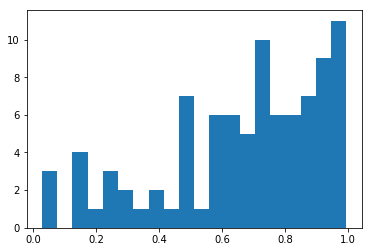

In [18]:
plt.hist(data_df['financialReturnsScore'].values, bins=20)
plt.show()

In [19]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
date                     91 non-null object
financialReturnsScore    91 non-null float64
growthScore              91 non-null float64
gsid                     91 non-null object
integratedScore          91 non-null float64
multipleScore            91 non-null float64
updateTime               91 non-null object
dtypes: float64(4), object(3)
memory usage: 5.1+ KB


In [20]:
len(gsids.values)

100

In [21]:
len(data)

91

### It seems that we are missing 9 ids

In [22]:
data_df.gsid.values

array(['75154', '193067', '194688', '902608', '85627', '13901', '150407',
       '161467', '82598', '11896', '230958', '49154', '76605', '85914',
       '193324', '75100', '149756', '213305', '79758', '69796', '81116',
       '202271', '84275', '76226', '18163', '80791', '152963', '227284',
       '222946', '61621', '59010', '902704', '901237', '80286', '77659',
       '15579', '53613', '16600', '216722', '46578', '75573', '53065',
       '84769', '46922', '13936', '193155', '91556', '64064', '79265',
       '151048', '176665', '46886', '183414', '70500', '16432', '905632',
       '86196', '11308', '55976', '188804', '226278', '26825', '183269',
       '905288', '29209', '188329', '10516', '75607', '18729', '16678',
       '44644', '223416', '26403', '59248', '78975', '903917', '78045',
       '12490', '40539', '148401', '17750', '198025', '66384', '85517',
       '217708', '79145', '85631', '86356', '905255', '14593', '85072'], dtype=object)

In [23]:
gsids.values

array(['10516', '10696', '11308', '11896', '13901', '13936', '14593',
       '148401', '149756', '150407', '15579', '173578', '12490', '176665',
       '177256', '17750', '85072', '183269', '183414', '151048', '18729',
       '188329', '188804', '193155', '193324', '198025', '152963',
       '161467', '213305', '216587', '216722', '217708', '22293', '222946',
       '223416', '16432', '16600', '227284', '230958', '25022', '26403',
       '26825', '29209', '172890', '18163', '46886', '40539', '44644',
       '46578', '46922', '49154', '53065', '53613', '55976', '59010',
       '59248', '61621', '64064', '66384', '69796', '70500', '75100',
       '75154', '75573', '75607', '76226', '76605', '193067', '77659',
       '78045', '78975', '79145', '79265', '79758', '80286', '80791',
       '81116', '82598', '194688', '84275', '197235', '84769', '905255',
       '85517', '85627', '85631', '85914', '86196', '86356', '86372',
       '202271', '901237', '226278', '902608', '902704', '903917',
   

In [24]:
missing_list = [i for i in gsids.values if i not in data_df.gsid.values]

In [25]:
payload = {
    "startDate": "2013-10-04",
    "endDate": "2013-11-04",
    "where": {
        "gsid": missing_list
    }
}
request_url = 'https://api.marquee.gs.com/v1/data/USCANFPP_MINI/query'
request = session.post(url=request_url, json = payload)
results_1 = json.loads(request.text)
data_1 = results_1['data']
print(data_1)

[{'date': '2013-10-04', 'gsid': '25022', 'financialReturnsScore': 0.346, 'growthScore': 0.268, 'multipleScore': 0.372, 'integratedScore': 0.414, 'updateTime': '2017-05-11T19:47:36Z'}, {'date': '2013-10-07', 'gsid': '25022', 'financialReturnsScore': 0.346, 'growthScore': 0.268, 'multipleScore': 0.38, 'integratedScore': 0.412, 'updateTime': '2017-05-11T19:47:36Z'}, {'date': '2013-10-08', 'gsid': '25022', 'financialReturnsScore': 0.346, 'growthScore': 0.27, 'multipleScore': 0.378, 'integratedScore': 0.412, 'updateTime': '2017-05-11T19:47:36Z'}, {'date': '2013-10-09', 'gsid': '25022', 'financialReturnsScore': 0.346, 'growthScore': 0.27, 'multipleScore': 0.374, 'integratedScore': 0.414, 'updateTime': '2017-05-11T19:47:36Z'}, {'date': '2013-10-10', 'gsid': '25022', 'financialReturnsScore': 0.346, 'growthScore': 0.27, 'multipleScore': 0.37, 'integratedScore': 0.416, 'updateTime': '2017-05-11T19:47:36Z'}, {'date': '2013-10-11', 'gsid': '25022', 'financialReturnsScore': 0.346, 'growthScore': 0.

### There is indeed some stocks that have no data on particular date.

### Let's get the data for entire 5 years for all the stocks.

In [26]:
payload = {
    "startDate": "2009-01-04",
    "endDate": "2018-11-04",
    "where": {
        "gsid": list(gsids.values)
    }
}
request_url = 'https://api.marquee.gs.com/v1/data/USCANFPP_MINI/query'
request = session.post(url=request_url, json = payload)
results = json.loads(request.text)
data_all = results['data']
#print(data_all)

In [27]:
df_all = pd.DataFrame(data_all)

In [28]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119632 entries, 0 to 119631
Data columns (total 7 columns):
date                     119632 non-null object
financialReturnsScore    119598 non-null float64
growthScore              119526 non-null float64
gsid                     119632 non-null object
integratedScore          119494 non-null float64
multipleScore            119614 non-null float64
updateTime               119632 non-null object
dtypes: float64(4), object(3)
memory usage: 6.4+ MB


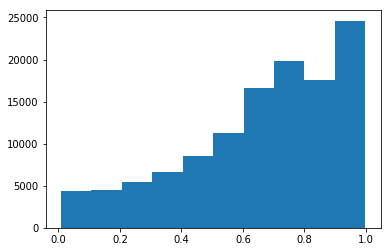

In [29]:
plt.hist(df_all['financialReturnsScore'].values[~np.isnan(df_all['financialReturnsScore'].values)])
plt.show()

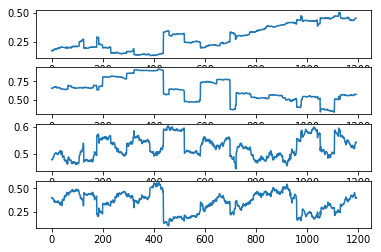

In [30]:
fig, axes = plt.subplots(4,1)
temp1=df_all['financialReturnsScore'][df_all['gsid']=='75154']
temp2=df_all['growthScore'][df_all['gsid']=='75154']
temp3=df_all['integratedScore'][df_all['gsid']=='75154']
temp4=df_all['multipleScore'][df_all['gsid']=='75154']
axes[0].plot(np.arange(len(temp1)),temp1)
axes[1].plot(np.arange(len(temp2)),temp2)
axes[2].plot(np.arange(len(temp3)),temp3)
axes[3].plot(np.arange(len(temp4)),temp4)
plt.show()

### Let's plot "apple"

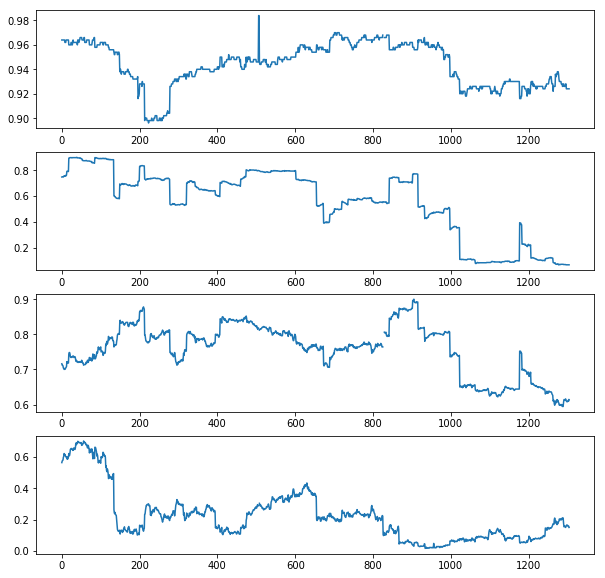

In [31]:
fig, axes = plt.subplots(4,1, figsize=(10,10))
temp1=df_all['financialReturnsScore'][df_all['gsid']=='14593']
temp2=df_all['growthScore'][df_all['gsid']=='14593']
temp3=df_all['integratedScore'][df_all['gsid']=='14593']
temp4=df_all['multipleScore'][df_all['gsid']=='14593']
axes[0].plot(np.arange(len(temp1)),temp1)
axes[1].plot(np.arange(len(temp2)),temp2)
axes[2].plot(np.arange(len(temp3)),temp3)
axes[3].plot(np.arange(len(temp4)),temp4)
plt.show()

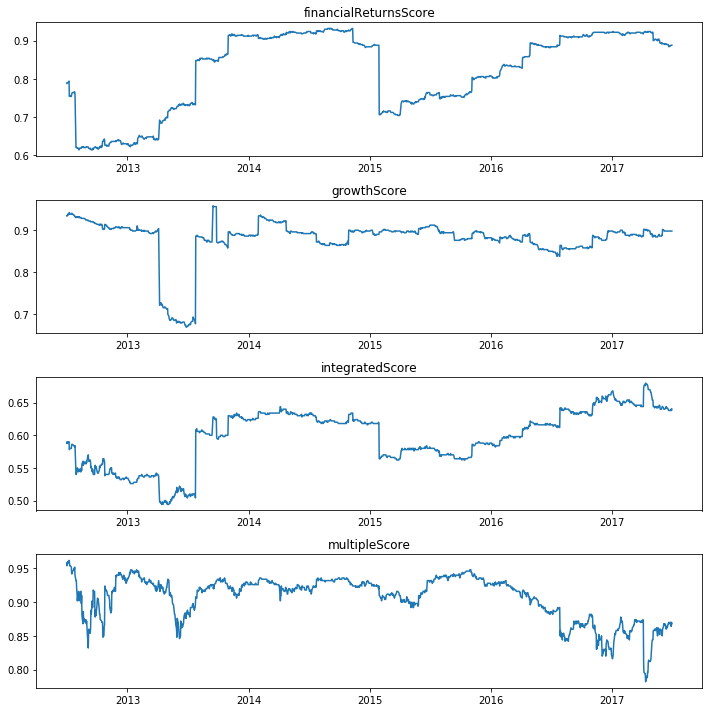

In [32]:
gsid = '227284' # Facebook
import datetime as dt

def plot_stock(gsid = gsid):
    fig, axes = plt.subplots(4,1, figsize=(10,10))
    temp1=df_all['financialReturnsScore'][df_all['gsid']==gsid]
    temp2=df_all['growthScore'][df_all['gsid']==gsid]
    temp3=df_all['integratedScore'][df_all['gsid']==gsid]
    temp4=df_all['multipleScore'][df_all['gsid']==gsid]
    
    dates = df_all['date'][df_all['gsid']==gsid]
    time = [dt.datetime.strptime(d, '%Y-%m-%d').date() for d in dates]
    axes[0].plot(time,temp1)
    axes[0].set_title('financialReturnsScore')
    axes[1].plot(time,temp2)
    axes[1].set_title('growthScore')
    axes[2].plot(time,temp3)
    axes[2].set_title('integratedScore')
    axes[3].plot(time,temp4)
    axes[3].set_title('multipleScore')
    plt.tight_layout()
    plt.show()
    
plot_stock(gsid)

### Try to get data from IEX

One is way is to use following codes.

In [33]:
request_url = 'https://api.iextrading.com/1.0/stock/aapl/chart/5y'
request = session.get(url=request_url)
results = json.loads(request.text)
stockData = pd.DataFrame(results)
print(stockData)

        change  changeOverTime  changePercent     close        date      high  \
0    -1.488600        0.000000         -2.421   60.0071  2013-03-04   61.1714   
1     1.584900        0.026410          2.641   61.5919  2013-03-05   62.1699   
2    -0.783142        0.013360         -1.272   60.8088  2013-03-06   62.1785   
3     0.702856        0.025074          1.156   61.5117  2013-03-07   61.7157   
4     0.162571        0.027782          0.264   61.6742  2013-03-08   62.2042   
5     0.878571        0.042423          1.425   62.5528  2013-03-11   62.7157   
6    -1.348600        0.019949         -2.156   61.2042  2013-03-12   62.6971   
7    -0.011429        0.019759         -0.019   61.1928  2013-03-13   62.0714   
8     0.592857        0.029640          0.969   61.7857  2013-03-14   62.0914   
9     1.594300        0.056207          2.580   63.3799  2013-03-15   63.4614   
10    1.722900        0.084918          2.718   65.1028  2013-03-18   65.3514   
11   -0.175714        0.0819

Second way is to use below.

In [41]:
import pandas_datareader as pdr
dr = pdr.iex.daily.IEXDailyReader(symbols = ['AAPL','FB'], start='7/2/2012', end='6/30/2017')
stock=dr.read()

5y


In [44]:
type(stock['AAPL'])

pandas.core.frame.DataFrame

In [50]:
payload = {
    "where": {
        "gsid": list(gsids.values)
    },
    "fields": [ "gsid", "ticker", "name" ],
    "limit": 1000
}

request_url = 'https://api.marquee.gs.com/v1/assets/data/query'
request = session.post(url=request_url, json = payload)
results = json.loads(request.text)
names = results['results']
print(names)


[{'name': 'Workday Inc-Class A', 'gsid': '230958', 'ticker': 'WDAY'}, {'name': 'Visa Inc-Class A Shares', 'gsid': '197235', 'ticker': 'V'}, {'name': 'Ralph Lauren Corp', 'gsid': '85072', 'ticker': 'RL'}, {'name': 'Netflix Inc', 'gsid': '149756', 'ticker': 'NFLX'}, {'name': 'Rite Aid Corp', 'gsid': '46922', 'ticker': 'RAD'}, {'name': 'Expedia Inc', 'gsid': '176665', 'ticker': 'EXPE'}, {'name': 'Walt Disney Co/the', 'gsid': '26403', 'ticker': 'DIS'}, {'name': 'Broadcom LTD', 'gsid': '202271', 'ticker': 'AVGO'}, {'name': 'Ultimate Software Group Inc', 'gsid': '86196', 'ticker': 'ULTI'}, {'name': 'United Natural Foods Inc', 'gsid': '84275', 'ticker': 'UNFI'}, {'name': 'Netapp Inc', 'gsid': '82598', 'ticker': 'NTAP'}, {'name': 'Tesla Inc', 'gsid': '213305', 'ticker': 'TSLA'}, {'name': 'Texas Instruments Inc', 'gsid': '15579', 'ticker': 'TXN'}, {'name': 'Facebook Inc-A', 'gsid': '227284', 'ticker': 'FB'}, {'name': 'Bed Bath & Beyond Inc', 'gsid': '77659', 'ticker': 'BBBY'}, {'name': 'Corners

In [53]:
names

[{'gsid': '230958', 'name': 'Workday Inc-Class A', 'ticker': 'WDAY'},
 {'gsid': '197235', 'name': 'Visa Inc-Class A Shares', 'ticker': 'V'},
 {'gsid': '85072', 'name': 'Ralph Lauren Corp', 'ticker': 'RL'},
 {'gsid': '149756', 'name': 'Netflix Inc', 'ticker': 'NFLX'},
 {'gsid': '46922', 'name': 'Rite Aid Corp', 'ticker': 'RAD'},
 {'gsid': '176665', 'name': 'Expedia Inc', 'ticker': 'EXPE'},
 {'gsid': '26403', 'name': 'Walt Disney Co/the', 'ticker': 'DIS'},
 {'gsid': '202271', 'name': 'Broadcom LTD', 'ticker': 'AVGO'},
 {'gsid': '86196', 'name': 'Ultimate Software Group Inc', 'ticker': 'ULTI'},
 {'gsid': '84275', 'name': 'United Natural Foods Inc', 'ticker': 'UNFI'},
 {'gsid': '82598', 'name': 'Netapp Inc', 'ticker': 'NTAP'},
 {'gsid': '213305', 'name': 'Tesla Inc', 'ticker': 'TSLA'},
 {'gsid': '15579', 'name': 'Texas Instruments Inc', 'ticker': 'TXN'},
 {'gsid': '227284', 'name': 'Facebook Inc-A', 'ticker': 'FB'},
 {'gsid': '77659', 'name': 'Bed Bath & Beyond Inc', 'ticker': 'BBBY'},
 {'

In [52]:
len(gsids.values)

100

In [55]:
names_df = pd.DataFrame(names)

In [58]:
'148401' in list(names_df.gsid)

False

In [63]:
len(np.unique(names_df.ticker.values))

99

In [67]:
dr_all = pdr.iex.daily.IEXDailyReader(symbols = list(np.unique(names_df.ticker.values)) , start='7/2/2012', end='6/30/2017')
stock_all=dr_all.read()

5y


In [68]:
len(stock_all)

99

In [70]:
stock_all['AAPL']

,open,high,low,close,volume
date,,,,,
2013-03-04,61.1142,61.1714,59.8571,60.0071,145406366
2013-03-05,60.2114,62.1699,60.1071,61.5919,159298020
2013-03-06,62.0728,62.1785,60.6328,60.8088,114903180
2013-03-07,60.6428,61.7157,60.1514,61.5117,116992841
2013-03-08,61.3999,62.2042,61.2299,61.6742,97854442
2013-03-11,61.3928,62.7157,60.7342,62.5528,118272126
2013-03-12,62.2285,62.6971,61.0814,61.2042,116268341
2013-03-13,61.2071,62.0714,60.7657,61.1928,101369051
2013-03-14,61.8328,62.0914,61.4928,61.7857,75834906


In [72]:
df_all

,date,financialReturnsScore,growthScore,gsid,integratedScore,multipleScore,updateTime
0,2012-07-02,0.178,0.656,75154,0.478,0.402,2017-05-11T19:47:36Z
1,2012-07-03,0.178,0.658,75154,0.478,0.400,2017-05-11T19:47:36Z
2,2012-07-04,0.176,0.658,75154,0.480,0.392,2017-05-11T19:47:36Z
3,2012-07-05,0.178,0.660,75154,0.480,0.396,2017-05-11T19:47:36Z
4,2012-07-06,0.176,0.660,75154,0.480,0.394,2017-05-11T19:47:36Z
5,2012-07-09,0.178,0.664,75154,0.484,0.392,2017-05-11T19:47:36Z
6,2012-07-10,0.182,0.668,75154,0.488,0.388,2017-05-11T19:47:36Z
7,2012-07-11,0.186,0.664,75154,0.488,0.388,2017-05-11T19:47:36Z
8,2012-07-12,0.188,0.666,75154,0.488,0.386,2017-05-11T19:47:36Z
9,2012-07-13,0.184,0.668,75154,0.494,0.372,2017-05-11T19:47:36Z


In [80]:
stockprice = pd.DataFrame()
for gsid in list(gsids.values):
   if(sum(names_df['gsid']==gsid)==0):
       continue
   tmp=names_df[names_df['gsid']==gsid]['ticker'].iloc[0]
   request_url='https://api.iextrading.com/1.0/stock/'+tmp+'/chart/5y'
   request = session.get(url=request_url)
   results = json.loads(request.text)
   stockData = pd.DataFrame(results)
   stockData['ticker']=tmp
   stockData['gsid']=gsid
   stockprice = stockprice.append(stockData)

In [81]:
stockprice

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap,ticker,gsid
0,0.05,0.000000,0.156,32.02,2013-03-04,32.1200,"Mar 4, 13",31.7100,31.91,3918668,3918668,31.9799,ADM,10516
1,0.19,0.005934,0.593,32.21,2013-03-05,32.3700,"Mar 5, 13",32.0600,32.14,4101151,4101151,32.2265,ADM,10516
2,0.11,0.009369,0.342,32.32,2013-03-06,32.4100,"Mar 6, 13",32.1600,32.24,3860954,3860954,32.2939,ADM,10516
3,0.25,0.017177,0.774,32.57,2013-03-07,32.6200,"Mar 7, 13",32.3200,32.45,3024827,3024827,32.5421,ADM,10516
4,-0.03,0.016240,-0.092,32.54,2013-03-08,32.7700,"Mar 8, 13",32.3850,32.48,4476075,4476075,32.5532,ADM,10516
5,-0.08,0.013741,-0.246,32.46,2013-03-11,32.6600,"Mar 11, 13",32.2300,32.41,2967257,2967257,32.4683,ADM,10516
6,0.10,0.016864,0.308,32.56,2013-03-12,32.6850,"Mar 12, 13",32.3000,32.41,3665364,3665364,32.5236,ADM,10516
7,0.37,0.028420,1.136,32.93,2013-03-13,32.9500,"Mar 13, 13",32.4250,32.55,4843290,4843290,32.7946,ADM,10516
8,-0.02,0.027795,-0.061,32.91,2013-03-14,32.9900,"Mar 14, 13",32.7800,32.99,3649215,3649215,32.9014,ADM,10516
9,0.09,0.030606,0.273,33.00,2013-03-15,33.0100,"Mar 15, 13",32.6000,32.80,6448781,6448781,32.9063,ADM,10516


### Need to combine the two data set with common date and gsid

In [133]:
df_merge = pd.merge(df_all, stockprice, how='inner', on=['date', 'gsid'])

In [134]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100612 entries, 0 to 100611
Data columns (total 19 columns):
date                     100612 non-null object
financialReturnsScore    100583 non-null float64
growthScore              100522 non-null float64
gsid                     100612 non-null object
integratedScore          100495 non-null float64
multipleScore            100597 non-null float64
updateTime               100612 non-null object
change                   100612 non-null float64
changeOverTime           100612 non-null float64
changePercent            100612 non-null float64
close                    100612 non-null float64
high                     100612 non-null float64
label                    100612 non-null object
low                      100612 non-null float64
open                     100612 non-null float64
unadjustedVolume         100612 non-null int64
volume                   100612 non-null int64
vwap                     100612 non-null float64
ticker         

In [140]:
df_final = df_merge.dropna()

In [142]:
df_final['financialReturnsScore'][df_final['ticker']=='AAPL'].values.mean()

0.94154553817847286

In [144]:
df_try = df_all.dropna()
df_try['financialReturnsScore'][df_try['gsid']=='14593'].values.mean()

0.94370461538461536

## Our goal is to use four scores to predict the changePercent everyday. 

In [146]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100495 entries, 0 to 100611
Data columns (total 19 columns):
date                     100495 non-null object
financialReturnsScore    100495 non-null float64
growthScore              100495 non-null float64
gsid                     100495 non-null object
integratedScore          100495 non-null float64
multipleScore            100495 non-null float64
updateTime               100495 non-null object
change                   100495 non-null float64
changeOverTime           100495 non-null float64
changePercent            100495 non-null float64
close                    100495 non-null float64
high                     100495 non-null float64
label                    100495 non-null object
low                      100495 non-null float64
open                     100495 non-null float64
unadjustedVolume         100495 non-null int64
volume                   100495 non-null int64
vwap                     100495 non-null float64
ticker         

In [159]:
temp = df_final[['financialReturnsScore', 'growthScore', 'integratedScore', 'multipleScore']]
label = df_final['changePercent'].values

In [169]:
temp['changePercent']= np.append(label[1:], 0)


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [181]:
train_df = temp.iloc[:-1,:]

In [182]:
train_df.corr()

,financialReturnsScore,growthScore,integratedScore,multipleScore,changePercent
financialReturnsScore,1.000000,-0.189994,0.581627,0.043107,-0.003409
growthScore,-0.189994,1.000000,0.244151,0.540155,0.005264
integratedScore,0.581627,0.244151,1.000000,-0.376903,0.003389
multipleScore,0.043107,0.540155,-0.376903,1.000000,-0.001673
changePercent,-0.003409,0.005264,0.003389,-0.001673,1.000000


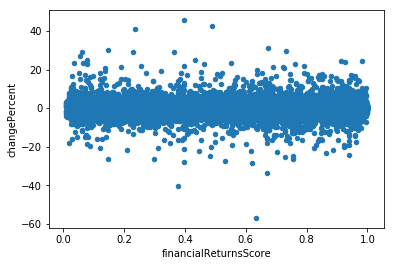

In [189]:
train_df.plot(kind='scatter', x='financialReturnsScore',y='changePercent')
plt.show()

In [196]:
df_final[['financialReturnsScore', 'growthScore', 'integratedScore', 'multipleScore','close']].corr()

,financialReturnsScore,growthScore,integratedScore,multipleScore,close
financialReturnsScore,1.000000,-0.189981,0.581634,0.043111,0.289604
growthScore,-0.189981,1.000000,0.244162,0.540155,0.093806
integratedScore,0.581634,0.244162,1.000000,-0.376894,0.055497
multipleScore,0.043111,0.540155,-0.376894,1.000000,0.287754
close,0.289604,0.093806,0.055497,0.287754,1.000000


In [201]:
df_final[df_final['ticker']=='AAPL'][['financialReturnsScore', 'growthScore', 'integratedScore', 'multipleScore','close']].corr()

,financialReturnsScore,growthScore,integratedScore,multipleScore,close
financialReturnsScore,1.000000,0.348101,0.427647,0.098430,0.325676
growthScore,0.348101,1.000000,0.921377,0.526217,-0.551337
integratedScore,0.427647,0.921377,1.000000,0.160456,-0.526098
multipleScore,0.098430,0.526217,0.160456,1.000000,-0.155199
close,0.325676,-0.551337,-0.526098,-0.155199,1.000000


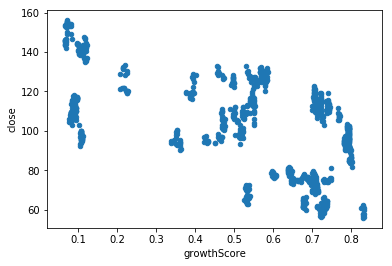

In [207]:
df_final[df_final['ticker']=='AAPL'].plot(kind='scatter', x='growthScore',y='close')
plt.show()

In [208]:
train = df_final[df_final['ticker']=='AAPL'][['financialReturnsScore', 'growthScore', 'integratedScore', 'multipleScore','close']]

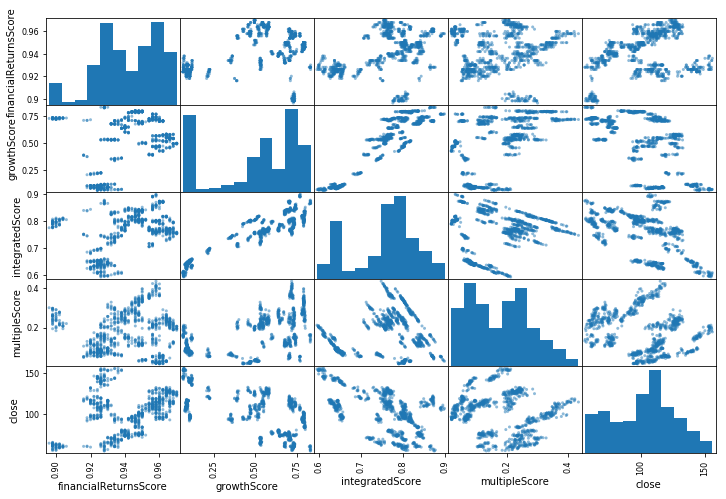

In [212]:
scatter_matrix(train,figsize = (12,8))
plt.show()

In [242]:
df_final['trend'] = np.append((-df_final['close'].values[:-20] + df_final['close'].values[20:])/df_final['close'].values[:-20], np.zeros(20))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [243]:
df_try = df_final.iloc[:-20,:]

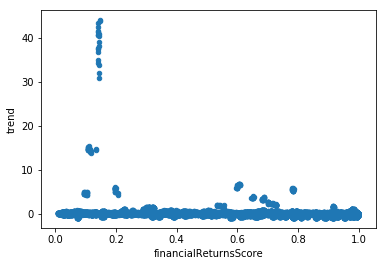

In [244]:
df_try.plot(kind='scatter', x='financialReturnsScore',y='trend')
plt.show()

In [245]:
df_try[['financialReturnsScore', 'growthScore', 'integratedScore', 'multipleScore','trend']].corr()

,financialReturnsScore,growthScore,integratedScore,multipleScore,trend
financialReturnsScore,1.000000,-0.190249,0.581499,0.043063,-0.049329
growthScore,-0.190249,1.000000,0.243936,0.540165,0.014081
integratedScore,0.581499,0.243936,1.000000,-0.377059,-0.021201
multipleScore,0.043063,0.540165,-0.377059,1.000000,-0.006025
trend,-0.049329,0.014081,-0.021201,-0.006025,1.000000


In [246]:
df_try[df_try['ticker']=='AAPL'][['financialReturnsScore', 'growthScore', 'integratedScore', 'multipleScore','trend']].corr()

,financialReturnsScore,growthScore,integratedScore,multipleScore,trend
financialReturnsScore,1.000000,0.348101,0.427647,0.098430,-0.213512
growthScore,0.348101,1.000000,0.921377,0.526217,-0.123856
integratedScore,0.427647,0.921377,1.000000,0.160456,-0.153588
multipleScore,0.098430,0.526217,0.160456,1.000000,-0.006954
trend,-0.213512,-0.123856,-0.153588,-0.006954,1.000000


In [247]:
who

LinearRegression	 X	 X_test	 X_train	 access_token	 access_token_dict	 attribs	 auth_data	 auth_request	 
axes	 changePercent	 data	 data_1	 data_all	 data_df	 df	 df_all	 df_final	 
df_merge	 df_try	 dr	 dr_all	 dt	 fig	 gsid	 gsids	 i	 
json	 label	 lin_reg	 list_	 missing_list	 names	 names_df	 np	 payload	 
pd	 pdr	 plot_stock	 plt	 request	 request_url	 requests	 results	 results_1	 
s1	 scatter_matrix	 session	 stock	 stockData	 stock_all	 stockprice	 temp	 temp1	 
temp2	 temp3	 temp4	 time	 tmp	 train	 train_data	 train_df	 train_test_split	 
wb	 y	 y_hat	 y_hat_test	 y_test	 y_train	 


In [249]:
df_all.to_csv('stock_score.csv',index=False)
stockprice.to_csv('stock_price.csv', index=False)
names_df.to_csv('stock_name.csv',index=False)